In [422]:
import numpy as np
import pandas as pd
import gzip
import json

from pprint import pprint


In [423]:
train_classification_df = pd.read_csv("/content/drive/MyDrive/CS412Data/train-classification.csv",)
train_classification_df = train_classification_df.rename(columns={'Unnamed: 0': 'user_id', 'label': 'category'})

# Unifying labels
train_classification_df["category"] = train_classification_df["category"].apply(str.lower)
username2_category = train_classification_df.set_index("user_id").to_dict()["category"]

In [424]:
train_data_path = "/content/drive/MyDrive/CS412Data/training-dataset.jsonl.gz"

username2posts_train = dict()
username2profile_train = dict()

username2posts_test = dict()
username2profile_test = dict()


with gzip.open(train_data_path, "rt") as fh:
  for line in fh:
    sample = json.loads(line)

    profile = sample["profile"]
    username = profile["username"]
    if username in username2_category:
      # train data info
      username2posts_train[username] = sample["posts"]
      username2profile_train[username] = profile


    else:
      # it is test data info
      username2posts_test[username] = sample["posts"]
      username2profile_test[username] = profile


# DATA PREPARATION

## PROFILE DATA

### Training

In [425]:
# Profile Dataframe
train_profile_df = pd.DataFrame(username2profile_train).T.reset_index(drop=True)
test_profile_df = pd.DataFrame(username2profile_test).T.reset_index(drop=True)

#train_profile_df.head(2)
train_profile_df.columns

Index(['username', 'id', 'full_name', 'biography', 'category_name',
       'post_count', 'follower_count', 'following_count',
       'is_business_account', 'is_private', 'is_verified',
       'highlight_reel_count', 'bio_links', 'entities', 'ai_agent_type',
       'fb_profile_biolink', 'restricted_by_viewer', 'country_block',
       'eimu_id', 'external_url', 'fbid', 'has_clips',
       'hide_like_and_view_counts', 'is_professional_account',
       'is_supervision_enabled', 'is_guardian_of_viewer',
       'is_supervised_by_viewer', 'is_supervised_user', 'is_embeds_disabled',
       'is_joined_recently', 'business_address_json',
       'business_contact_method', 'business_email', 'business_phone_number',
       'business_category_name', 'overall_category_name', 'category_enum',
       'is_verified_by_mv4b', 'is_regulated_c18', 'profile_pic_url',
       'should_show_category', 'should_show_public_contacts',
       'show_account_transparency_details', 'profile_picture_base64'],
      dtyp

In [426]:
#train_profile_df.rename(columns={ 'id': 'profile_id'}, inplace=True)

In [427]:
# Drop unnecesarry and null columns
columns_to_drop = ['external_url','profile_pic_url','full_name', 'ai_agent_type','business_email','business_phone_number'
,'overall_category_name', 'fb_profile_biolink' ,'restricted_by_viewer', 'profile_picture_base64', 'bio_links','business_address_json' ]

train_profile_df_cleaned = train_profile_df.drop(columns=columns_to_drop)


In [428]:
# The columns that only has ONE UNIQUE value

train_profile_df_cleaned = train_profile_df_cleaned.drop(columns=['entities','show_account_transparency_details','country_block','is_supervision_enabled'
                    , 'is_guardian_of_viewer', 'is_supervised_by_viewer','is_supervised_user','is_embeds_disabled','is_joined_recently',
                      'is_verified_by_mv4b', 'is_regulated_c18'])

In [429]:
train_profile_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   username                     2741 non-null   object
 1   id                           2741 non-null   object
 2   biography                    2571 non-null   object
 3   category_name                2226 non-null   object
 4   post_count                   275 non-null    object
 5   follower_count               2741 non-null   object
 6   following_count              2741 non-null   object
 7   is_business_account          2741 non-null   object
 8   is_private                   2741 non-null   object
 9   is_verified                  2741 non-null   object
 10  highlight_reel_count         2741 non-null   object
 11  eimu_id                      2741 non-null   object
 12  fbid                         2741 non-null   object
 13  has_clips                    2741

In [430]:
# Ensure numerical columns are of the correct type
numerical_columns = [ 'follower_count', 'following_count','post_count','highlight_reel_count']
for col in numerical_columns:
    train_profile_df_cleaned[col] = pd.to_numeric(train_profile_df_cleaned[col], errors='coerce').fillna(0)

# Verify the preparation
print(train_profile_df_cleaned[numerical_columns].describe())


       follower_count  following_count    post_count  highlight_reel_count
count    2.741000e+03      2741.000000   2741.000000           2741.000000
mean     3.227150e+05       478.603794    176.446188             12.935060
std      6.106939e+06       949.429332   1001.694227             29.812029
min      1.800000e+01         0.000000      0.000000              0.000000
25%      3.442000e+03         8.000000      0.000000              3.000000
50%      1.351300e+04        76.000000      0.000000              7.000000
75%      6.496600e+04       544.000000      0.000000             13.000000
max      3.113148e+08      7513.000000  27419.000000            870.000000


In [431]:
boolean_columns = ['is_business_account', 'is_private', 'is_verified','has_clips','hide_like_and_view_counts','is_professional_account'
,'should_show_category', 'should_show_public_contacts']
for col in boolean_columns:
    train_profile_df_cleaned[col] = train_profile_df_cleaned[col].astype(int)

In [432]:
train_profile_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   username                     2741 non-null   object 
 1   id                           2741 non-null   object 
 2   biography                    2571 non-null   object 
 3   category_name                2226 non-null   object 
 4   post_count                   2741 non-null   float64
 5   follower_count               2741 non-null   int64  
 6   following_count              2741 non-null   int64  
 7   is_business_account          2741 non-null   int64  
 8   is_private                   2741 non-null   int64  
 9   is_verified                  2741 non-null   int64  
 10  highlight_reel_count         2741 non-null   int64  
 11  eimu_id                      2741 non-null   object 
 12  fbid                         2741 non-null   object 
 13  has_clips         

#### Map Categorical Data

In [433]:
# Drop null values and get unique values
unique_business_categories = train_profile_df_cleaned['business_category_name'].dropna().unique()

# Define the mapping
business_category_mapping = {
    'Creators & Celebrities': 'entertainment',
    'Personal Goods & General Merchandise Stores': 'fashion',
    'Local Events': 'entertainment',
    'Grocery & Convenience Stores': 'food',
    'Home Services': 'health and lifestyle',
    'Publishers': 'general interest',
    'Restaurants': 'food',
    'General Interest': 'general interest',
    'Lifestyle Services': 'health and lifestyle',
    'Non-Profits & Religious Organizations': 'general interest',
    'Government Agencies': 'general interest',
    'Home Goods Stores': 'home and lifestyle',
    'Professional Services': 'general interest',
    'Transportation & Accomodation Services': 'travel',
    'Business & Utility Services': 'general interest',
    'Food & Personal Goods': 'food',
    'Auto Dealers': 'tech',
    'Content & Apps': 'tech',
    'Geography': 'general interest',
    'Entities': 'general interest',
}

# Apply the mapping
train_profile_df_cleaned['mapped_business_category'] = train_profile_df_cleaned['business_category_name'].map(business_category_mapping)
train_profile_df_cleaned = train_profile_df_cleaned.drop(columns=['business_category_name'])




In [434]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the categories
train_profile_df_cleaned['encoded_business_category'] = label_encoder.fit_transform(train_profile_df_cleaned['mapped_business_category'])

# Save the mapping for reference
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Category Mapping:", category_mapping)

# Verify the encoded categories
print(train_profile_df_cleaned[['mapped_business_category', 'encoded_business_category']].head())
print(train_profile_df_cleaned.shape)

Category Mapping: {'entertainment': 0, 'fashion': 1, 'food': 2, 'general interest': 3, 'health and lifestyle': 4, 'home and lifestyle': 5, 'tech': 6, 'travel': 7, nan: 8}
  mapped_business_category  encoded_business_category
0                      NaN                          8
1                      NaN                          8
2            entertainment                          0
3                      NaN                          8
4                      NaN                          8
(2741, 22)


In [435]:
train_profile_df_cleaned['category_name']
unique_category_name = train_profile_df_cleaned['category_name'].dropna().unique()

category_name_mapping = {
    # Food-related
    'Restaurant': 'food',
    'Cafe': 'food',
    'Fast Food Restaurant': 'food',
    'Grocery Store': 'food',
    'Bakery': 'food',
    'Seafood Restaurant': 'food',
    'Turkish Restaurant': 'food',
    'Comfort Food Restaurant': 'food',
    'Specialty Grocery Store': 'food',
    'Food & beverage': 'food',
    'Food & Drink': 'food',
    'Dessert Shop': 'food',
    'Ice Cream Shop': 'food',
    'Health Food Store': 'food',
    'Health Food Restaurant': 'food',
    'Food Consultant': 'food',
    'Food Wholesaler': 'food',

    # Art-related
    'Art': 'art',
    'Artist': 'art',
    'Performing Arts': 'art',
    'Visual Arts': 'art',
    'Art School': 'art',
    'Performance Art': 'art',
    'Performance Art Theatre': 'art',
    'Theatrical Productions': 'art',
    'Arts & entertainment': 'art',
    'Performing Arts School': 'art',
    'Arts & Crafts Store': 'art',

    # Entertainment-related
    'TV channel': 'entertainment',
    'Musician': 'entertainment',
    'TV show': 'entertainment',
    'Video creator': 'entertainment',
    'Digital creator': 'entertainment',
    'Music': 'entertainment',
    'Comedian': 'entertainment',
    'Dance & Night Club': 'entertainment',
    'Media': 'entertainment',
    'Movie Theater': 'entertainment',
    'Broadcasting & media production company': 'entertainment',

    # Fashion-related
    'Clothing (Brand)': 'fashion',
    'Jewelry & Watches Store': 'fashion',
    'Jewelry/watches': 'fashion',
    'Fashion Designer': 'fashion',
    'Design & fashion': 'fashion',
    'Beauty, cosmetic & personal care': 'fashion',
    'Bridal Shop': 'fashion',
    'Footwear store': 'fashion',
    'Clothing store': 'fashion',
    'Retail company': 'fashion',
    'Sunglasses & Eyewear Store': 'fashion',

    # Gaming-related
    'Gaming video creator': 'gaming',
    'Games/toys': 'gaming',
    'Video Game Store': 'gaming',

    # Health and Lifestyle
    'Health/beauty': 'health and lifestyle',
    'Vitamins/supplements': 'health and lifestyle',
    'Health & wellness website': 'health and lifestyle',
    'Hospital': 'health and lifestyle',
    'Medical & health': 'health and lifestyle',
    'Doctor': 'health and lifestyle',
    'Dentist & Dental Office': 'health and lifestyle',
    'Therapist': 'health and lifestyle',
    'Plastic Surgeon': 'health and lifestyle',
    'Pharmaceutical Company': 'health and lifestyle',
    'Nutritionist': 'health and lifestyle',

    # Mom and Children
    'Baby goods/kids goods': 'mom and children',
    "Baby & children's clothing store": 'mom and children',
    'Child Development': 'mom and children',

    # Sports-related
    'Sports Club': 'sports',
    'Sports league': 'sports',
    'Sports Event': 'sports',
    'Gym/Physical Fitness Center': 'sports',
    'Sports team': 'sports',
    'Athlete': 'sports',

    # Tech-related
    'Software Company': 'tech',
    'Science, Technology & Engineering': 'tech',
    'Information Technology Company': 'tech',
    'Tech Company': 'tech',
    'Computer Company': 'tech',
    'App page': 'tech',
    'Digital/Software': 'tech',

    # Travel-related
    'Tour Agency': 'travel',
    'Hotel': 'travel',
    'Hotel resort': 'travel',
    'Transportation & Accomodation Services': 'travel',
    'Travel Company': 'travel',
    'Travel agency': 'travel',
    'Beach Resort': 'travel',
    'Boat Tour Agency': 'travel',
    'Tourist Information Center': 'travel',
    'Airline Company': 'travel',
}

train_profile_df_cleaned['mapped_category_name'] = train_profile_df_cleaned['category_name'].map(category_name_mapping)
train_cleaned_profile_df = train_profile_df_cleaned.drop(columns=['category_name'])



In [436]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the categories
train_profile_df_cleaned['encoded_category_name'] = label_encoder.fit_transform(train_profile_df_cleaned['mapped_category_name'])

# Save the mapping for reference
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Category Mapping:", category_mapping)

# Verify the encoded categories
print(train_profile_df_cleaned[['mapped_category_name', 'encoded_category_name']].head())
print(train_profile_df_cleaned.shape)

Category Mapping: {'art': 0, 'entertainment': 1, 'fashion': 2, 'food': 3, 'gaming': 4, 'health and lifestyle': 5, 'mom and children': 6, 'sports': 7, 'tech': 8, 'travel': 9, nan: 10}
  mapped_category_name  encoded_category_name
0                  NaN                     10
1                  NaN                     10
2                  NaN                     10
3                  NaN                     10
4                  NaN                     10
(2741, 24)


In [437]:

unique_category_name = train_profile_df_cleaned['category_enum'].dropna().unique()

category_enum_mapping = {
    # Tech-related
    'SOFTWARE_COMPANY': 'tech',
    'INFORMATION_TECHNOLOGY_COMPANY': 'tech',
    'DIGITAL_CREATOR': 'tech',
    'ELECTRONICS': 'tech',
    'APP': 'tech',
    'ELECTRONICS_COMPANY': 'tech',
    'COMPUTER_COMPANY': 'tech',
    'SOFTWARE': 'tech',
    'WEBSITE': 'tech',

    # Entertainment-related
    'DIGITAL_CREATOR': 'entertainment',
    'MUSICIAN': 'entertainment',
    'VIDEO_CREATOR': 'entertainment',
    'TV_CHANNEL': 'entertainment',
    'MOVIE_WRITER': 'entertainment',
    'THEATRICAL_PRODUCTIONS': 'entertainment',
    'PERFORMING_ARTS': 'entertainment',
    'ACTOR': 'entertainment',
    'RADIO_STATION': 'entertainment',
    'TV_SHOW': 'entertainment',
    'THEATRE': 'entertainment',

    # Health and Lifestyle-related
    'HEALTH_BEAUTY': 'health and lifestyle',
    'HOSPITAL': 'health and lifestyle',
    'HEALTH_SITE': 'health and lifestyle',
    'MEDICAL_HEALTH': 'health and lifestyle',
    'PHYSICAL_THERAPIST': 'health and lifestyle',
    'MEDICAL_CENTER': 'health and lifestyle',
    'SPA_BEAUTY_PERSONAL_CARE': 'health and lifestyle',
    'DENTIST': 'health and lifestyle',
    'VITAMIN_SUPPLEMENTS': 'health and lifestyle',

    # Food-related
    'RESTAURANT': 'food',
    'FAST_FOOD_RESTAURANT': 'food',
    'SEAFOOD_RESTAURANT': 'food',
    'BAKERY': 'food',
    'FAMILY_STYLE_RESTAURANT': 'food',
    'CAFE': 'food',
    'FOOD_COMPANY': 'food',
    'FOOD_BEVERAGE': 'food',
    'COMFORT_FOOD_RESTAURANT': 'food',

    # Sports-related
    'SPORTS_CLUB': 'sports',
    'SPORTS_LEAGUE': 'sports',
    'SPORTS_EVENT': 'sports',
    'SPORTS_TEAM': 'sports',
    'ATHLETE': 'sports',

    # Travel-related
    'TRAVEL_AGENCY': 'travel',
    'HOTEL_LODGING': 'travel',
    'BEACH_RESORT': 'travel',
    'TOURISM': 'travel',
    'TRAVEL_COMPANY': 'travel',

    # Fashion-related
    'CLOTHING': 'fashion',
    'JEWELRY_STORE': 'fashion',
    'SHOE_STORE': 'fashion',
    'BOUTIQUE': 'fashion',

    # Miscellaneous
    'POLITICIAN': 'politics',
    'GOVERNMENT_ORGANIZATION': 'government',
    'NGO': 'nonprofit',
    'COMMUNITY': 'community',
    'PERSONAL_BLOG': 'blog',
    'FINANCIAL_SERVICES': 'finance',
    'CONSULTING_COMPANY': 'consulting',
    'MEDIA_NEWS_COMPANY': 'media',
    'NEWS_SITE': 'media',
    'RADIO_STATION': 'media',
}
train_profile_df_cleaned['mapped_category_enum'] = train_profile_df_cleaned['category_enum'].map(category_enum_mapping)
train_profile_df_cleaned = train_profile_df_cleaned.drop(columns=['category_enum'])



In [438]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the categories
train_profile_df_cleaned['encoded_category_enum'] = label_encoder.fit_transform(train_profile_df_cleaned['mapped_category_enum'])

# Save the mapping for reference
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Category Mapping:", category_mapping)

# Verify the encoded categories
print(train_profile_df_cleaned[['mapped_category_enum', 'encoded_category_enum']].head())
print(train_profile_df_cleaned.shape)

Category Mapping: {'blog': 0, 'community': 1, 'consulting': 2, 'entertainment': 3, 'fashion': 4, 'finance': 5, 'food': 6, 'government': 7, 'health and lifestyle': 8, 'media': 9, 'nonprofit': 10, 'politics': 11, 'sports': 12, 'tech': 13, 'travel': 14, nan: 15}
  mapped_category_enum  encoded_category_enum
0                  NaN                     15
1                  NaN                     15
2        entertainment                      3
3             politics                     11
4                  NaN                     15
(2741, 25)


In [439]:
train_profile_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   username                     2741 non-null   object 
 1   id                           2741 non-null   object 
 2   biography                    2571 non-null   object 
 3   category_name                2226 non-null   object 
 4   post_count                   2741 non-null   float64
 5   follower_count               2741 non-null   int64  
 6   following_count              2741 non-null   int64  
 7   is_business_account          2741 non-null   int64  
 8   is_private                   2741 non-null   int64  
 9   is_verified                  2741 non-null   int64  
 10  highlight_reel_count         2741 non-null   int64  
 11  eimu_id                      2741 non-null   object 
 12  fbid                         2741 non-null   object 
 13  has_clips         

### Test

In [440]:
# Profile Dataframe
test_profile_df = pd.DataFrame(username2profile_test).T.reset_index(drop=True)

test_profile_df.columns

Index(['username', 'id', 'full_name', 'biography', 'category_name',
       'post_count', 'follower_count', 'following_count',
       'is_business_account', 'is_private', 'is_verified',
       'highlight_reel_count', 'bio_links', 'entities', 'ai_agent_type',
       'fb_profile_biolink', 'restricted_by_viewer', 'country_block',
       'eimu_id', 'external_url', 'fbid', 'has_clips',
       'hide_like_and_view_counts', 'is_professional_account',
       'is_supervision_enabled', 'is_guardian_of_viewer',
       'is_supervised_by_viewer', 'is_supervised_user', 'is_embeds_disabled',
       'is_joined_recently', 'business_address_json',
       'business_contact_method', 'business_email', 'business_phone_number',
       'business_category_name', 'overall_category_name', 'category_enum',
       'is_verified_by_mv4b', 'is_regulated_c18', 'profile_pic_url',
       'should_show_category', 'should_show_public_contacts',
       'show_account_transparency_details', 'profile_picture_base64'],
      dtyp

In [441]:
#test_profile_df.rename(columns={ 'id': 'profile_id'}, inplace=True)

In [442]:
# Drop unnecesarry and null columns
columns_to_drop = ['external_url','profile_pic_url','full_name', 'ai_agent_type','business_email','business_phone_number'
,'overall_category_name', 'fb_profile_biolink' ,'restricted_by_viewer', 'profile_picture_base64', 'bio_links','business_address_json' ]

test_profile_df_cleaned = test_profile_df.drop(columns=columns_to_drop)


In [443]:
# Drop null values and get unique values
unique_business_categories = test_profile_df_cleaned['show_account_transparency_details'].dropna().unique()

# Display the unique values
print(unique_business_categories)


[True]


In [444]:
# The columns that only has ONE UNIQUE value

test_profile_df_cleaned = test_profile_df_cleaned.drop(columns=['entities','show_account_transparency_details','country_block','is_supervision_enabled'
                    , 'is_guardian_of_viewer', 'is_supervised_by_viewer','is_supervised_user','is_embeds_disabled','is_joined_recently',
                      'is_verified_by_mv4b', 'is_regulated_c18'])

In [445]:
test_profile_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2674 entries, 0 to 2673
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   username                     2674 non-null   object
 1   id                           2674 non-null   object
 2   biography                    2496 non-null   object
 3   category_name                2169 non-null   object
 4   post_count                   304 non-null    object
 5   follower_count               2674 non-null   object
 6   following_count              2674 non-null   object
 7   is_business_account          2674 non-null   object
 8   is_private                   2674 non-null   object
 9   is_verified                  2674 non-null   object
 10  highlight_reel_count         2674 non-null   object
 11  eimu_id                      2674 non-null   object
 12  fbid                         2674 non-null   object
 13  has_clips                    2674

In [446]:
# Ensure numerical columns are of the correct type anf Fill missing values
numerical_columns = [ 'follower_count', 'following_count','post_count','highlight_reel_count']
for col in numerical_columns:
    test_profile_df_cleaned[col] = pd.to_numeric(test_profile_df_cleaned[col], errors='coerce').fillna(0)

# Verify the preparation
print(test_profile_df_cleaned[numerical_columns].describe())


       follower_count  following_count    post_count  highlight_reel_count
count    2.674000e+03      2674.000000   2674.000000           2674.000000
mean     2.774107e+05       500.126028    200.034031             16.824981
std      2.242862e+06      1023.817455   1284.290126            189.026993
min      1.600000e+01         0.000000      0.000000              0.000000
25%      3.321500e+03         9.000000      0.000000              2.000000
50%      1.366200e+04        74.000000      0.000000              7.000000
75%      7.126025e+04       563.000000      0.000000             13.000000
max      6.324671e+07      7533.000000  30856.000000           9660.000000


In [447]:
boolean_columns = ['is_business_account', 'is_private', 'is_verified','has_clips','hide_like_and_view_counts','is_professional_account'
,'should_show_category', 'should_show_public_contacts']
for col in boolean_columns:
    test_profile_df_cleaned[col] = test_profile_df_cleaned[col].astype(int)

In [448]:
test_profile_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2674 entries, 0 to 2673
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   username                     2674 non-null   object 
 1   id                           2674 non-null   object 
 2   biography                    2496 non-null   object 
 3   category_name                2169 non-null   object 
 4   post_count                   2674 non-null   float64
 5   follower_count               2674 non-null   int64  
 6   following_count              2674 non-null   int64  
 7   is_business_account          2674 non-null   int64  
 8   is_private                   2674 non-null   int64  
 9   is_verified                  2674 non-null   int64  
 10  highlight_reel_count         2674 non-null   int64  
 11  eimu_id                      2674 non-null   object 
 12  fbid                         2674 non-null   object 
 13  has_clips         

#### Map Categorical Data

In [449]:
# Drop null values and get unique values
unique_business_categories = test_profile_df_cleaned['business_category_name'].dropna().unique()

# Define the mapping
business_category_mapping = {
    'Creators & Celebrities': 'entertainment',
    'Personal Goods & General Merchandise Stores': 'fashion',
    'Local Events': 'entertainment',
    'Grocery & Convenience Stores': 'food',
    'Home Services': 'health and lifestyle',
    'Publishers': 'general interest',
    'Restaurants': 'food',
    'General Interest': 'general interest',
    'Lifestyle Services': 'health and lifestyle',
    'Non-Profits & Religious Organizations': 'general interest',
    'Government Agencies': 'general interest',
    'Home Goods Stores': 'home and lifestyle',
    'Professional Services': 'general interest',
    'Transportation & Accomodation Services': 'travel',
    'Business & Utility Services': 'general interest',
    'Food & Personal Goods': 'food',
    'Auto Dealers': 'tech',
    'Content & Apps': 'tech',
    'Geography': 'general interest',
    'Entities': 'general interest',
}

# Apply the mapping
test_profile_df_cleaned['mapped_business_category'] = test_profile_df_cleaned['business_category_name'].map(business_category_mapping)
test_profile_df_cleaned = test_profile_df_cleaned.drop(columns=['business_category_name'])




In [450]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the categories
test_profile_df_cleaned['encoded_business_category'] = label_encoder.fit_transform(test_profile_df_cleaned['mapped_business_category'])

# Save the mapping for reference
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Category Mapping:", category_mapping)

# Verify the encoded categories
print(test_profile_df_cleaned[['mapped_business_category', 'encoded_business_category']].head())
print(test_profile_df_cleaned.shape)

Category Mapping: {'entertainment': 0, 'fashion': 1, 'food': 2, 'general interest': 3, 'health and lifestyle': 4, 'home and lifestyle': 5, 'tech': 6, 'travel': 7, nan: 8}
  mapped_business_category  encoded_business_category
0                      NaN                          8
1                      NaN                          8
2                      NaN                          8
3                      NaN                          8
4                      NaN                          8
(2674, 22)


In [451]:
test_profile_df_cleaned['category_name']
unique_category_name = test_profile_df_cleaned['category_name'].dropna().unique()

category_name_mapping = {
    # Food-related
    'Restaurant': 'food',
    'Cafe': 'food',
    'Fast Food Restaurant': 'food',
    'Grocery Store': 'food',
    'Bakery': 'food',
    'Seafood Restaurant': 'food',
    'Turkish Restaurant': 'food',
    'Comfort Food Restaurant': 'food',
    'Specialty Grocery Store': 'food',
    'Food & beverage': 'food',
    'Food & Drink': 'food',
    'Dessert Shop': 'food',
    'Ice Cream Shop': 'food',
    'Health Food Store': 'food',
    'Health Food Restaurant': 'food',
    'Food Consultant': 'food',
    'Food Wholesaler': 'food',

    # Art-related
    'Art': 'art',
    'Artist': 'art',
    'Performing Arts': 'art',
    'Visual Arts': 'art',
    'Art School': 'art',
    'Performance Art': 'art',
    'Performance Art Theatre': 'art',
    'Theatrical Productions': 'art',
    'Arts & entertainment': 'art',
    'Performing Arts School': 'art',
    'Arts & Crafts Store': 'art',

    # Entertainment-related
    'TV channel': 'entertainment',
    'Musician': 'entertainment',
    'TV show': 'entertainment',
    'Video creator': 'entertainment',
    'Digital creator': 'entertainment',
    'Music': 'entertainment',
    'Comedian': 'entertainment',
    'Dance & Night Club': 'entertainment',
    'Media': 'entertainment',
    'Movie Theater': 'entertainment',
    'Broadcasting & media production company': 'entertainment',

    # Fashion-related
    'Clothing (Brand)': 'fashion',
    'Jewelry & Watches Store': 'fashion',
    'Jewelry/watches': 'fashion',
    'Fashion Designer': 'fashion',
    'Design & fashion': 'fashion',
    'Beauty, cosmetic & personal care': 'fashion',
    'Bridal Shop': 'fashion',
    'Footwear store': 'fashion',
    'Clothing store': 'fashion',
    'Retail company': 'fashion',
    'Sunglasses & Eyewear Store': 'fashion',

    # Gaming-related
    'Gaming video creator': 'gaming',
    'Games/toys': 'gaming',
    'Video Game Store': 'gaming',

    # Health and Lifestyle
    'Health/beauty': 'health and lifestyle',
    'Vitamins/supplements': 'health and lifestyle',
    'Health & wellness website': 'health and lifestyle',
    'Hospital': 'health and lifestyle',
    'Medical & health': 'health and lifestyle',
    'Doctor': 'health and lifestyle',
    'Dentist & Dental Office': 'health and lifestyle',
    'Therapist': 'health and lifestyle',
    'Plastic Surgeon': 'health and lifestyle',
    'Pharmaceutical Company': 'health and lifestyle',
    'Nutritionist': 'health and lifestyle',

    # Mom and Children
    'Baby goods/kids goods': 'mom and children',
    "Baby & children's clothing store": 'mom and children',
    'Child Development': 'mom and children',

    # Sports-related
    'Sports Club': 'sports',
    'Sports league': 'sports',
    'Sports Event': 'sports',
    'Gym/Physical Fitness Center': 'sports',
    'Sports team': 'sports',
    'Athlete': 'sports',

    # Tech-related
    'Software Company': 'tech',
    'Science, Technology & Engineering': 'tech',
    'Information Technology Company': 'tech',
    'Tech Company': 'tech',
    'Computer Company': 'tech',
    'App page': 'tech',
    'Digital/Software': 'tech',

    # Travel-related
    'Tour Agency': 'travel',
    'Hotel': 'travel',
    'Hotel resort': 'travel',
    'Transportation & Accomodation Services': 'travel',
    'Travel Company': 'travel',
    'Travel agency': 'travel',
    'Beach Resort': 'travel',
    'Boat Tour Agency': 'travel',
    'Tourist Information Center': 'travel',
    'Airline Company': 'travel',
}

test_profile_df_cleaned['mapped_category_name'] = test_profile_df_cleaned['category_name'].map(category_name_mapping)
test_profile_df_cleaned = test_profile_df_cleaned.drop(columns=['category_name'])



In [452]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the categories
test_profile_df_cleaned['encoded_category_name'] = label_encoder.fit_transform(test_profile_df_cleaned['mapped_category_name'])

# Save the mapping for reference
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Category Mapping:", category_mapping)

# Verify the encoded categories
print(test_profile_df_cleaned[['mapped_category_name', 'encoded_category_name']].head())
print(test_profile_df_cleaned.shape)

Category Mapping: {'art': 0, 'entertainment': 1, 'fashion': 2, 'food': 3, 'gaming': 4, 'health and lifestyle': 5, 'mom and children': 6, 'sports': 7, 'tech': 8, 'travel': 9, nan: 10}
  mapped_category_name  encoded_category_name
0                  NaN                     10
1                  NaN                     10
2                  NaN                     10
3                  NaN                     10
4                  NaN                     10
(2674, 23)


In [453]:

unique_category_name = test_profile_df_cleaned['category_enum'].dropna().unique()

category_enum_mapping = {
    # Tech-related
    'SOFTWARE_COMPANY': 'tech',
    'INFORMATION_TECHNOLOGY_COMPANY': 'tech',
    'DIGITAL_CREATOR': 'tech',
    'ELECTRONICS': 'tech',
    'APP': 'tech',
    'ELECTRONICS_COMPANY': 'tech',
    'COMPUTER_COMPANY': 'tech',
    'SOFTWARE': 'tech',
    'WEBSITE': 'tech',

    # Entertainment-related
    'DIGITAL_CREATOR': 'entertainment',
    'MUSICIAN': 'entertainment',
    'VIDEO_CREATOR': 'entertainment',
    'TV_CHANNEL': 'entertainment',
    'MOVIE_WRITER': 'entertainment',
    'THEATRICAL_PRODUCTIONS': 'entertainment',
    'PERFORMING_ARTS': 'entertainment',
    'ACTOR': 'entertainment',
    'RADIO_STATION': 'entertainment',
    'TV_SHOW': 'entertainment',
    'THEATRE': 'entertainment',

    # Health and Lifestyle-related
    'HEALTH_BEAUTY': 'health and lifestyle',
    'HOSPITAL': 'health and lifestyle',
    'HEALTH_SITE': 'health and lifestyle',
    'MEDICAL_HEALTH': 'health and lifestyle',
    'PHYSICAL_THERAPIST': 'health and lifestyle',
    'MEDICAL_CENTER': 'health and lifestyle',
    'SPA_BEAUTY_PERSONAL_CARE': 'health and lifestyle',
    'DENTIST': 'health and lifestyle',
    'VITAMIN_SUPPLEMENTS': 'health and lifestyle',

    # Food-related
    'RESTAURANT': 'food',
    'FAST_FOOD_RESTAURANT': 'food',
    'SEAFOOD_RESTAURANT': 'food',
    'BAKERY': 'food',
    'FAMILY_STYLE_RESTAURANT': 'food',
    'CAFE': 'food',
    'FOOD_COMPANY': 'food',
    'FOOD_BEVERAGE': 'food',
    'COMFORT_FOOD_RESTAURANT': 'food',

    # Sports-related
    'SPORTS_CLUB': 'sports',
    'SPORTS_LEAGUE': 'sports',
    'SPORTS_EVENT': 'sports',
    'SPORTS_TEAM': 'sports',
    'ATHLETE': 'sports',

    # Travel-related
    'TRAVEL_AGENCY': 'travel',
    'HOTEL_LODGING': 'travel',
    'BEACH_RESORT': 'travel',
    'TOURISM': 'travel',
    'TRAVEL_COMPANY': 'travel',

    # Fashion-related
    'CLOTHING': 'fashion',
    'JEWELRY_STORE': 'fashion',
    'SHOE_STORE': 'fashion',
    'BOUTIQUE': 'fashion',

    # Miscellaneous
    'POLITICIAN': 'politics',
    'GOVERNMENT_ORGANIZATION': 'government',
    'NGO': 'nonprofit',
    'COMMUNITY': 'community',
    'PERSONAL_BLOG': 'blog',
    'FINANCIAL_SERVICES': 'finance',
    'CONSULTING_COMPANY': 'consulting',
    'MEDIA_NEWS_COMPANY': 'media',
    'NEWS_SITE': 'media',
    'RADIO_STATION': 'media',
}
test_profile_df_cleaned['mapped_category_enum'] = test_profile_df_cleaned['category_enum'].map(category_enum_mapping)
test_profile_df_cleaned = test_profile_df_cleaned.drop(columns=['category_enum'])



In [454]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the categories
test_profile_df_cleaned['encoded_category_enum'] = label_encoder.fit_transform(test_profile_df_cleaned['mapped_category_enum'])

# Save the mapping for reference
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Category Mapping:", category_mapping)

# Verify the encoded categories
print(test_profile_df_cleaned[['mapped_category_enum', 'encoded_category_enum']].head())
print(test_profile_df_cleaned.shape)

Category Mapping: {'blog': 0, 'community': 1, 'consulting': 2, 'entertainment': 3, 'fashion': 4, 'food': 5, 'government': 6, 'health and lifestyle': 7, 'media': 8, 'nonprofit': 9, 'politics': 10, 'sports': 11, 'tech': 12, 'travel': 13, nan: 14}
  mapped_category_enum  encoded_category_enum
0                 blog                      0
1                  NaN                     14
2                  NaN                     14
3        entertainment                      3
4                media                      8
(2674, 24)


In [455]:
test_profile_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2674 entries, 0 to 2673
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   username                     2674 non-null   object 
 1   id                           2674 non-null   object 
 2   biography                    2496 non-null   object 
 3   post_count                   2674 non-null   float64
 4   follower_count               2674 non-null   int64  
 5   following_count              2674 non-null   int64  
 6   is_business_account          2674 non-null   int64  
 7   is_private                   2674 non-null   int64  
 8   is_verified                  2674 non-null   int64  
 9   highlight_reel_count         2674 non-null   int64  
 10  eimu_id                      2674 non-null   object 
 11  fbid                         2674 non-null   object 
 12  has_clips                    2674 non-null   int64  
 13  hide_like_and_view

## POST DATA

In [456]:
# Flatten posts data into a DataFrame
post_flattened_data = []

for username, posts in username2posts_train.items():
    for post in posts:
        post_data = post.copy()
        post_data["username"] = username  # Add username to each post
        post_flattened_data.append(post_data)

post_flattened_test_data = []

for username, posts in username2posts_test.items():
    for post in posts:
        post_data = post.copy()
        post_data["username"] = username
        post_flattened_test_data.append(post_data)

# Create DataFrames
train_posts_df = pd.DataFrame(post_flattened_data)
test_posts_df = pd.DataFrame(post_flattened_test_data)


# Display the DataFrame
#print(train_posts_df.head(2))
print(train_posts_df.columns)


Index(['caption', 'comments_count', 'id', 'like_count', 'media_type',
       'media_url', 'timestamp', 'username'],
      dtype='object')


### Train

In [457]:
#train_posts_df.rename(columns={ 'id': 'post_id'}, inplace=True)

In [458]:
# Drop unnecesarry and null columns
columns_to_drop = [ 'media_url']
train_posts_df = train_posts_df.drop(columns=columns_to_drop)
print(train_posts_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94824 entries, 0 to 94823
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   caption         91285 non-null  object 
 1   comments_count  94824 non-null  int64  
 2   id              94824 non-null  object 
 3   like_count      91320 non-null  float64
 4   media_type      94824 non-null  object 
 5   timestamp       94824 non-null  object 
 6   username        94824 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.1+ MB
None


In [459]:
#DERIVE INFO FROM MEDIA TYPE
# One-hot encode media types
one_hot_encoded_media_types = pd.get_dummies(train_posts_df['media_type'], prefix='media_type')

# Concatenate the one-hot encoded columns with the original DataFrame
train_posts_df_cleaned = pd.concat([train_posts_df, one_hot_encoded_media_types], axis=1)

train_posts_df_cleaned = train_posts_df_cleaned.drop(columns = 'media_type')
# Verify the result
print("One-Hot Encoded Media Types:")
print(train_posts_df_cleaned.head())

media_columns = ['media_type_VIDEO', 'media_type_IMAGE','media_type_CAROUSEL_ALBUM']
for col in media_columns:
    train_posts_df_cleaned[col] = train_posts_df_cleaned[col].astype(int)

One-Hot Encoded Media Types:
                                             caption  comments_count  \
0          Cumhuriyetimizin 100.yılı kutlu olsun♾️🇹🇷               0   
1  Oriflame Duologi Lansmanı #isveçtengelengüzell...               1   
2                     #oriflameilesaçbakımdevrimi ✌️               0   
3  ✌️#oriflameilesaçbakımdevrimi 07Agustos’23 ori...               1   
4            07 Agustos’23 #oriflameturkiye #duoloji               0   

                  id  like_count            timestamp    username  \
0  17990918969458720         6.0  2023-10-29 09:12:30  deparmedya   
1  18219250732221045        22.0  2023-08-08 19:11:13  deparmedya   
2  18311380465102328        19.0  2023-08-07 21:40:54  deparmedya   
3  18089518138361507        19.0  2023-08-07 21:27:48  deparmedya   
4  18012743929758497        21.0  2023-08-07 21:12:06  deparmedya   

   media_type_CAROUSEL_ALBUM  media_type_IMAGE  media_type_VIDEO  
0                      False              True          

In [460]:
# Convert timestamp to datetime and extract derived features
train_posts_df_cleaned['timestamp'] = pd.to_datetime(train_posts_df_cleaned['timestamp'])

train_posts_df_cleaned['hour'] = train_posts_df_cleaned['timestamp'].dt.hour
train_posts_df_cleaned['day'] = train_posts_df_cleaned['timestamp'].dt.day
train_posts_df_cleaned['weekday'] = train_posts_df_cleaned['timestamp'].dt.weekday

# Drop the original timestamp column if not needed
train_posts_df_cleaned.drop(columns=['timestamp'], inplace=True)

# Verify the new features
print(train_posts_df_cleaned[['hour', 'day', 'weekday']].head())


   hour  day  weekday
0     9   29        6
1    19    8        1
2    21    7        0
3    21    7        0
4    21    7        0


In [461]:
print(train_posts_df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94824 entries, 0 to 94823
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   caption                    91285 non-null  object 
 1   comments_count             94824 non-null  int64  
 2   id                         94824 non-null  object 
 3   like_count                 91320 non-null  float64
 4   username                   94824 non-null  object 
 5   media_type_CAROUSEL_ALBUM  94824 non-null  int64  
 6   media_type_IMAGE           94824 non-null  int64  
 7   media_type_VIDEO           94824 non-null  int64  
 8   hour                       94824 non-null  int32  
 9   day                        94824 non-null  int32  
 10  weekday                    94824 non-null  int32  
dtypes: float64(1), int32(3), int64(4), object(3)
memory usage: 6.9+ MB
None


### Test

In [462]:
#test_posts_df.rename(columns={ 'id': 'post_id'}, inplace=True)

In [463]:
# Drop unnecesarry and null columns
columns_to_drop = [ 'media_url']
test_posts_df = test_posts_df.drop(columns=columns_to_drop)
print(test_posts_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92478 entries, 0 to 92477
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   caption         89383 non-null  object 
 1   comments_count  92478 non-null  int64  
 2   id              92478 non-null  object 
 3   like_count      91763 non-null  float64
 4   media_type      92478 non-null  object 
 5   timestamp       92478 non-null  object 
 6   username        92478 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.9+ MB
None


In [464]:
#DERIVE INFO FROM MEDIA TYPE
# One-hot encode media types
one_hot_encoded_media_types = pd.get_dummies(test_posts_df['media_type'], prefix='media_type')

# Concatenate the one-hot encoded columns with the original DataFrame
test_posts_df_cleaned = pd.concat([test_posts_df, one_hot_encoded_media_types], axis=1)

test_posts_df_cleaned = test_posts_df_cleaned.drop(columns = 'media_type')
# Verify the result
print("One-Hot Encoded Media Types:")
print(test_posts_df_cleaned.head())

media_columns = ['media_type_VIDEO', 'media_type_IMAGE','media_type_CAROUSEL_ALBUM']
for col in media_columns:
    test_posts_df_cleaned[col] = test_posts_df_cleaned[col].astype(int)

One-Hot Encoded Media Types:
                                             caption  comments_count  \
0  Bu diyaloğun yaşanmadığı bir online toplantı o...               0   
1  Evet Ocak ayında beyaz yakalı whatsup grupları...               2   
2   Yine yuzlercesini gorecegimiz maillerden biri 😀🙈               1   
3                                   İyi haftalar ! 😀               0   
4                                        Bir iç ses😀               0   

                  id  like_count            timestamp        username  \
0  17934192878560092        15.0  2023-04-26 18:12:46  beyazyakaliyiz   
1  17984334430863265        10.0  2023-01-30 22:23:39  beyazyakaliyiz   
2  17959523612091085        14.0  2022-10-25 07:00:08  beyazyakaliyiz   
3  17953007285187318         6.0  2022-10-24 08:18:03  beyazyakaliyiz   
4  17963586901967134        10.0  2022-10-14 08:33:03  beyazyakaliyiz   

   media_type_CAROUSEL_ALBUM  media_type_IMAGE  media_type_VIDEO  
0                      False    

In [465]:
# Convert timestamp to datetime and extract derived features
test_posts_df_cleaned['timestamp'] = pd.to_datetime(test_posts_df_cleaned['timestamp'])

test_posts_df_cleaned['hour'] = test_posts_df_cleaned['timestamp'].dt.hour
test_posts_df_cleaned['day'] = test_posts_df_cleaned['timestamp'].dt.day
test_posts_df_cleaned['weekday'] = test_posts_df_cleaned['timestamp'].dt.weekday

# Drop the original timestamp column if not needed
test_posts_df_cleaned.drop(columns=['timestamp'], inplace=True)

# Verify the new features
print(test_posts_df_cleaned[['hour', 'day', 'weekday']].head())


   hour  day  weekday
0    18   26        2
1    22   30        0
2     7   25        1
3     8   24        0
4     8   14        4


In [466]:
print(test_posts_df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92478 entries, 0 to 92477
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   caption                    89383 non-null  object 
 1   comments_count             92478 non-null  int64  
 2   id                         92478 non-null  object 
 3   like_count                 91763 non-null  float64
 4   username                   92478 non-null  object 
 5   media_type_CAROUSEL_ALBUM  92478 non-null  int64  
 6   media_type_IMAGE           92478 non-null  int64  
 7   media_type_VIDEO           92478 non-null  int64  
 8   hour                       92478 non-null  int32  
 9   day                        92478 non-null  int32  
 10  weekday                    92478 non-null  int32  
dtypes: float64(1), int32(3), int64(4), object(3)
memory usage: 6.7+ MB
None


# CLASSIFICATION-PREDICTION MODELS

In [467]:
train_merged_df = pd.merge(train_posts_df, train_profile_df, on='username', how='inner')


## CLASSIFICATION

### TEXT DATA

In [468]:
#@title Turkish StopWords

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
turkish_stopwords = stopwords.words('turkish')
english_stopwords = stopwords.words('english')
# Convert stopword set to a list
combined_stopwords = list(turkish_stopwords + english_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [469]:
import re
import string

import re

def preprocess_and_remove_stopwords(text, stopwords_set):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-ZçğıöşüÇĞİÖŞÜ\s]', '', text)
    # Tokenize and remove stopwords
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stopwords_set]
    # Join tokens back into a single string
    return ' '.join(filtered_tokens)




In [470]:
corpus = []  # Stores aggregated captions for each user
train_usernames = []  # Keeps usernames to maintain label order

# Aggregate captions by user
for username, posts in username2posts_train.items():
    train_usernames.append(username)

    # Collect and preprocess captions
    cleaned_captions = []
    for post in posts:
        post_caption = post.get("caption", "")
        if post_caption:  # Skip None or empty captions
            post_caption = preprocess_and_remove_stopwords(post_caption,combined_stopwords)
            cleaned_captions.append(post_caption)

    # Combine captions for the user
    user_post_captions = "\n".join(cleaned_captions)
    corpus.append(user_post_captions)

# Create a DataFrame for user-level aggregated captions
user_captions_df = pd.DataFrame({
    'username': train_usernames,
    'aggregated_captions_from_posts': corpus
})

print("Aggregated Captions from Posts:")
print(user_captions_df.head())


Aggregated Captions from Posts:
               username                     aggregated_captions_from_posts
0            deparmedya  cumhuriyetimizin yılı kutlu olsun\noriflame du...
1            kafesfirin  bugün bir fincan köpüklü türk kahvesiyle taçla...
2              vimerang  saygı özlemle atatürk kasım kasim vimerang\nde...
3     mustafa_yalcinn38  altınoluk çevre şehircilik iklim değişikliği b...
4  zorluenergysolutions  güne enerjik bir sohbet devam etmek ister misi...


In [471]:
test_corpus = []  # Stores aggregated captions for each user (test data)
test_usernames = []  # Keeps usernames to maintain label order for test data

# Aggregate captions by user in the test set
for username, posts in username2posts_test.items():
    test_usernames.append(username)

    # Collect and preprocess captions for test users
    cleaned_captions = []
    for post in posts:
        post_caption = post.get("caption", "")
        if post_caption:  # Skip None or empty captions
            post_caption = preprocess_and_remove_stopwords(post_caption, combined_stopwords)
            cleaned_captions.append(post_caption)

    # Combine captions for the user in test data
    user_post_captions = "\n".join(cleaned_captions)
    test_corpus.append(user_post_captions)

# Create a DataFrame for user-level aggregated captions for test data
user_captions_test_df = pd.DataFrame({
    'username': test_usernames,
    'aggregated_captions_from_posts': test_corpus
})

print("Aggregated Captions from Posts (Test Data):")
print(user_captions_test_df.head())


Aggregated Captions from Posts (Test Data):
                     username  \
0              beyazyakaliyiz   
1  totalenergies_istasyonlari   
2                 konforyatak   
3                    ht_kulup   
4                   ajansspor   

                      aggregated_captions_from_posts  
0  diyaloğun yaşanmadığı bir online toplantı olma...  
1  başöğretmenimiz gazi mustafa kemal atatürkün ı...  
2  pure active yatak yumuşacık sağlıklı bir uyku ...  
3  ht kulüp yeni bölümüyle pazar akşamı saat bloo...  
4  adana demirsporun kasım ayı takvimi kaç puan g...  


In [472]:
biography_corpus = []  # Stores aggregated biographies for each user
train_usernames = []  # Keeps usernames to maintain label order

# Aggregate biographies by user
for username, profile in username2profile_train.items():  # Adjust key based on your data structure
    train_usernames.append(username)

    # Collect and preprocess biography
    biography_text = profile.get("biography", "")
    if biography_text:  # Skip None or empty biographies
        biography_text = preprocess_and_remove_stopwords(biography_text, combined_stopwords)

    # Add processed biography to the corpus
    biography_corpus.append(biography_text)

# Create a DataFrame for user-level aggregated biographies
user_biographies_df = pd.DataFrame({
    'username': train_usernames,
    'processed_biography': biography_corpus
})

print("Aggregated Biographies:")
print(user_biographies_df.head())





Aggregated Biographies:
               username                                processed_biography
0            deparmedya              mediaplanning mediabuying sosyalmedya
1            kafesfirin  sogutozuftz avm ankara macrocenter migroslarda...
2              vimerang          dijital iletişim yönetimiinfovimerangcomq
3     mustafa_yalcinn38                             talas belediye baskanı
4  zorluenergysolutions  türkiyenin ilindeki yaygın elektrikli şarj ist...


In [473]:
biography_corpus_test = []  # Stores aggregated biographies for each user (test data)
test_usernames = []  # Keeps usernames to maintain label order for test data

# Aggregate biographies by user in the test set
for username, profile in username2profile_test.items():  # Adjust key based on your test data structure
    test_usernames.append(username)

    # Collect and preprocess biography for test users
    biography_text = profile.get("biography", "")
    if biography_text:  # Skip None or empty biographies
        biography_text = preprocess_and_remove_stopwords(biography_text, combined_stopwords)

    # Add processed biography to the test corpus
    biography_corpus_test.append(biography_text)

# Create a DataFrame for user-level aggregated biographies for test data
user_biographies_test_df = pd.DataFrame({
    'username': test_usernames,
    'processed_biography': biography_corpus_test
})

print("Aggregated Biographies (Test Data):")
print(user_biographies_test_df.head())


Aggregated Biographies (Test Data):
                     username  \
0              beyazyakaliyiz   
1  totalenergies_istasyonlari   
2                 konforyatak   
3                    ht_kulup   
4                   ajansspor   

                                 processed_biography  
0            beyaz yakalıların dünyasına hoşgeldiniz  
1  totalenergies istasyonları resmi instagram hes...  
2  konfor yatak birbirinden farklı özelliklere sa...  
3                      bloomberght habertürk magazin  
4  saran group anında tarafsız spor haberleri twi...  


In [474]:
train_profile_df_cleaned.reset_index(drop=True, inplace=True)
user_biographies_df.reset_index(drop=True, inplace=True)
user_captions_df.reset_index(drop=True, inplace=True)


In [475]:
test_profile_df_cleaned.reset_index(drop=True, inplace=True)
user_captions_test_df.reset_index(drop=True, inplace=True)
user_biographies_test_df.reset_index(drop=True, inplace=True)


#### TF-IDF VECTORIZER

In [476]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words=combined_stopwords,
    max_features=5000,
    ngram_range=(1, 2)
)

# Fit and transform the processed captions
tfidf_features_caption = vectorizer.fit_transform(user_captions_df['aggregated_captions_from_posts'])

tfidf_features_caption_test = vectorizer.transform(user_captions_test_df['aggregated_captions_from_posts'])

# View the TF-IDF matrix shape
print("TF-IDF matrix shape:", tfidf_features_caption.shape)


TF-IDF matrix shape: (2741, 5000)


In [477]:
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['abdullah', 'abone', 'acele', ..., 'şık bir', 'şıklık', 'şıklığı'],
      dtype=object)

In [478]:
from sklearn.feature_extraction.text import TfidfVectorizer
user_biographies_df['processed_biography'] = user_biographies_df['processed_biography'].fillna("")
user_biographies_test_df['processed_biography'] = user_biographies_test_df['processed_biography'].fillna("")

vectorizer = TfidfVectorizer(
    stop_words=combined_stopwords,
    max_features=700,
    ngram_range=(1, 2)
)

# Fit and transform the processed biography
tfidf_features_biography = vectorizer.fit_transform(user_biographies_df['processed_biography'])

tfidf_features_biography_test = vectorizer.transform(user_biographies_test_df['processed_biography'])


# View the TF-IDF matrix shape
print("TF-IDF matrix shape:", tfidf_features_biography.shape)




TF-IDF matrix shape: (2741, 700)


#### MERGE DATAFRAMES

In [479]:
# Convert TF-IDF matrices to dense arrays
biography_tfidf_dense = tfidf_features_biography.toarray()
caption_tfidf_dense = tfidf_features_caption.toarray()

biography_tfidf_dense_test = tfidf_features_biography_test.toarray()
caption_tfidf_dense_test = tfidf_features_caption_test.toarray()

In [480]:
# Generate column names for biography TF-IDF features
biography_feature_names = [f"biography_tfidf_{i}" for i in range(biography_tfidf_dense.shape[1])]

# Generate column names for caption TF-IDF features
caption_feature_names = [f"caption_tfidf_{i}" for i in range(caption_tfidf_dense.shape[1])]

biography_feature_names_test = [f"biography_tfidf_{i}" for i in range(biography_tfidf_dense_test.shape[1])]
caption_feature_names_test = [f"caption_tfidf_{i}" for i in range(caption_tfidf_dense_test.shape[1])]


In [481]:
import pandas as pd

# Create DataFrames for TF-IDF features
biography_tfidf_df = pd.DataFrame(biography_tfidf_dense, columns=biography_feature_names)
caption_tfidf_df = pd.DataFrame(caption_tfidf_dense, columns=caption_feature_names)


biography_tfidf_df['username'] = train_profile_df_cleaned['username'].reset_index(drop=True)
caption_tfidf_df['username'] = train_profile_df_cleaned['username'].reset_index(drop=True)


# Concatenate weighted biography features with caption features
combined_tfidf_df = pd.concat([
    biography_tfidf_df.set_index('username'),
    caption_tfidf_df.set_index('username'),
], axis=1)

biography_tfidf_df_test = pd.DataFrame(biography_tfidf_dense_test, columns=biography_feature_names_test)
caption_tfidf_df_test = pd.DataFrame(caption_tfidf_dense_test, columns=caption_feature_names_test)


biography_tfidf_df_test['username'] = test_profile_df_cleaned['username'].reset_index(drop=True)
caption_tfidf_df_test['username'] = test_profile_df_cleaned['username'].reset_index(drop=True)

combined_tfidf_df_test = pd.concat([
    biography_tfidf_df_test.set_index('username'),
    caption_tfidf_df_test.set_index('username'),
], axis=1)

In [482]:


#train_cleaned_with_tfidf = pd.concat([train_profile_df_cleaned.reset_index(drop=True), biography_tfidf_df, caption_tfidf_df], axis=1)

#train_cleaned_with_tfidf.shape
#print(train_cleaned_with_tfidf.info())

In [483]:
from sklearn.preprocessing import LabelEncoder
y_train_ilk = [username2_category.get(uname, "NA") for uname in train_usernames]

# Encode y_train_ilk
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_ilk)


In [484]:
# Add the encoded target to the DataFrame
# Example of converting boolean columns to integers
#train_profile_df_cleaned['is_biography_entities_identical'] = train_profile_df_cleaned['is_biography_entities_identical'].astype(int)

# Select relevant numeric columns
numeric_features = [
    'follower_count',
    'encoded_category_name',
    'encoded_category_enum',
    'following_count',
    'is_business_account',
    'is_private',
    'is_verified',
    'highlight_reel_count',
    'has_clips',
    'hide_like_and_view_counts',
    'is_professional_account',
    'should_show_category',
    'should_show_public_contacts',
    #'follower_following_ratio',
    'is_business_account',
    'is_private',
    'is_verified',
    'has_clips','hide_like_and_view_counts','is_professional_account'
              , 'should_show_category','should_show_public_contacts'
]
X_train = train_profile_df_cleaned[numeric_features]

X_train['y_train_encoded'] = y_train_encoded

# Compute correlation
correlation_with_target = X_train.corr()['y_train_encoded'].drop('y_train_encoded')

# Print the correlations
print(correlation_with_target)


follower_count                -0.034215
encoded_category_name          0.191898
encoded_category_enum          0.072809
following_count               -0.056296
is_business_account            0.106438
is_private                    -0.022964
is_verified                   -0.086006
highlight_reel_count          -0.040866
has_clips                     -0.007931
hide_like_and_view_counts     -0.013018
is_professional_account        0.032481
should_show_category           0.000651
should_show_public_contacts    0.053977
is_business_account            0.106438
is_private                    -0.022964
is_verified                   -0.086006
has_clips                     -0.007931
hide_like_and_view_counts     -0.013018
is_professional_account        0.032481
should_show_category           0.000651
should_show_public_contacts    0.053977
Name: y_train_encoded, dtype: float64


<ipython-input-484-8c704703c451>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['y_train_encoded'] = y_train_encoded


In [485]:
# Merge the encoded categories with the combined TF-IDF DataFrame

combined_tfidf_df = pd.merge(
    combined_tfidf_df,
    train_profile_df_cleaned[['username','encoded_category_enum','encoded_category_name']],
    on='username',
    how='left'
)


numerical_columns = ['username', 'follower_count', 'following_count']


# Verify the result
print("Shape after merging:", combined_tfidf_df.shape)
print(combined_tfidf_df.head())


Shape after merging: (2741, 5703)
               username  biography_tfidf_0  biography_tfidf_1  \
0            deparmedya                0.0                0.0   
1            kafesfirin                0.0                0.0   
2              vimerang                0.0                0.0   
3     mustafa_yalcinn38                0.0                0.0   
4  zorluenergysolutions                0.0                0.0   

   biography_tfidf_2  biography_tfidf_3  biography_tfidf_4  biography_tfidf_5  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   biography_tfidf_6  biography_tfidf_7  biography_tfidf_8  ...  \
0                0.0 

In [486]:
combined_tfidf_df_test = pd.merge(
    combined_tfidf_df_test,
    test_profile_df_cleaned[['username','encoded_category_enum','encoded_category_name']],
    on='username',
    how='left'
)

In [487]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Define features and target
X = combined_tfidf_df.drop(columns=['username'])
#X = combined_tfidf_df
X = X.fillna(0)
y = y_train_ilk # Replace with your target column

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred))

# Feature Importance
importances = clf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df.head(30))


                      precision    recall  f1-score   support

                 art       0.55      0.16      0.24        38
       entertainment       0.30      0.34      0.32        59
             fashion       0.60      0.75      0.67        55
                food       0.75      0.94      0.83       114
              gaming       0.00      0.00      0.00         5
health and lifestyle       0.52      0.71      0.60        96
    mom and children       0.00      0.00      0.00        34
              sports       1.00      0.15      0.26        27
                tech       0.62      0.76      0.68        59
              travel       0.69      0.58      0.63        62

            accuracy                           0.60       549
           macro avg       0.50      0.44      0.42       549
        weighted avg       0.57      0.60      0.55       549

                    Feature  Importance
3386     caption_tfidf_2686    0.010909
3396     caption_tfidf_2696    0.005785
3389     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [488]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler(feature_range=(0, 1))  # Shift values to [0, 1]
X_train_nonnegative = scaler_minmax.fit_transform(X_train)
X_val_nonnegative = scaler_minmax.transform(X_val)


model = MultinomialNB()
model.fit(X_train_nonnegative, y_train)

MultinomialNB()

In [489]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define parameter grid
param_grid = {'alpha': [0.4, 0.7, 0.5, 1.5, 2.0]}

# Set up GridSearchCV
grid_search = GridSearchCV(
    MultinomialNB(),
    param_grid,
    scoring='accuracy',  # Use appropriate metric
    cv=5                 # 5-fold cross-validation
)

# Perform grid search on training data
grid_search.fit(X_train_nonnegative, y_train)

# Best model and parameter
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

print(f"Best alpha: {best_alpha}")


Best alpha: 0.4


In [490]:
#@title Train Data
y_train_pred = best_model.predict(X_train_nonnegative)

print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred, zero_division=0))

Accuracy: 0.8252737226277372

Classification Report:
                      precision    recall  f1-score   support

                 art       0.81      0.78      0.80       153
       entertainment       0.80      0.78      0.79       264
             fashion       0.77      0.90      0.83       244
                food       0.93      0.87      0.90       397
              gaming       1.00      0.75      0.86         8
health and lifestyle       0.82      0.74      0.78       406
    mom and children       0.92      0.84      0.88       115
              sports       0.92      0.84      0.88        86
                tech       0.77      0.90      0.83       287
              travel       0.77      0.79      0.78       232

            accuracy                           0.83      2192
           macro avg       0.85      0.82      0.83      2192
        weighted avg       0.83      0.83      0.83      2192



In [491]:
#@title Validation Data
y_val_pred = best_model.predict(X_val_nonnegative)

print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred, zero_division=0))

Accuracy: 0.6265938069216758

Classification Report:
                      precision    recall  f1-score   support

                 art       0.31      0.29      0.30        38
       entertainment       0.38      0.46      0.42        59
             fashion       0.62      0.78      0.69        55
                food       0.82      0.77      0.80       114
              gaming       0.00      0.00      0.00         5
health and lifestyle       0.71      0.58      0.64        96
    mom and children       0.72      0.38      0.50        34
              sports       0.79      0.56      0.65        27
                tech       0.59      0.83      0.69        59
              travel       0.62      0.68      0.65        62

            accuracy                           0.63       549
           macro avg       0.56      0.53      0.53       549
        weighted avg       0.64      0.63      0.62       549



In [492]:
#@title Test Data


# let's take a look at the first 5 lines of the file
test_data_path = "/content/drive/MyDrive/CS412Data/test-classification-round3.dat"
!head -n 5 "$test_data_path"

print("*****")

test_unames = []
with open(test_data_path, "rt") as fh:
  for line in fh:
    test_unames.append(line.strip())

print(len(test_unames))


livapastanesi
barisgross
tusasshop
etolyadigital
tugrulonur
*****
1000


In [524]:
filtered_rows = []

# Iterate through test usernames and try to find them in the test or train DataFrame
missing_usernames = []
for uname in test_unames:
    try:
        # First, try to get the row from the test DataFrame
        row = combined_tfidf_df_test.loc[combined_tfidf_df_test['username'] == uname]
        if not row.empty:
            filtered_rows.append(row)
            continue  # Found in test, no need to check train

        # If not found in test, try train
        row = combined_tfidf_df.loc[combined_tfidf_df['username'] == uname]
        if not row.empty:
            filtered_rows.append(row)
        else:
            # If not found in either, log the username
            missing_usernames.append(uname)
    except Exception as e:
        print(f"Error processing username '{uname}': {e}")

# Combine all collected rows into a single DataFrame
if filtered_rows:
    filtered_test_df = pd.concat(filtered_rows).reset_index(drop=True)
else:
    filtered_test_df = pd.DataFrame()  # Empty DataFrame if no rows were collected

print(f"Filtered DataFrame shape: {filtered_test_df.shape}")

# Log missing usernames
if missing_usernames:
    print(f"Usernames not found in either test or train: {len(missing_usernames)}")
    print(missing_usernames)

# Extract features for prediction
if not filtered_test_df.empty:
    x_test_filtered = filtered_test_df.drop(columns=['username'], errors='ignore')  # Drop username column
    test_pred_filtered = model.predict(x_test_filtered)

    # Create the output in the required format
    output_filtered = dict(zip(filtered_test_df['username'], test_pred_filtered))

    # Save the output to a JSON file
    output_path = "/content/drive/MyDrive/CS412Data/abc_filtered_test_predictions.json"
    with open(output_path, "w") as json_file:
        json.dump(output_filtered, json_file, indent=4)

    print(f"Filtered predictions saved to {output_path}.")
else:
    print("No data available for prediction.")

Filtered DataFrame shape: (1000, 5703)
Filtered predictions saved to /content/drive/MyDrive/CS412Data/abc_filtered_test_predictions.json.


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [493]:
test_Data = combined_tfidf_df_test.drop(columns=['username'])
test_pred = best_model.predict(test_Data)

output = dict()
for index, uname in enumerate(combined_tfidf_df_test['username']):
  output[uname] = test_pred[index]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [494]:

# Define the file path within your Google Drive
file_path = "/content/drive/My Drive/CS412Data/output_round3.json"

# Save the JSON output
with open(file_path, "w", encoding="utf-8") as of:
    json.dump(output, of, indent=4, ensure_ascii=False)

print(f"Output saved to {file_path}")

Output saved to /content/drive/My Drive/CS412Data/output_round3.json


## LIKE COUNT PREDICTION

#### Parameter Analysis

In [495]:
# Define final feature columns
#media_type_columns = ['media_type_VIDEO', 'media_type_IMAGE','media_type_IMAGE' ]

final_features = (
    numerical_columns  + boolean_columns +
    [ 'hour', 'day', 'weekday','predicted_like_count']
)

# Prepare feature matrix (X) and target (y)
X = train_posts_df_cleaned.drop(columns = ['like_count', 'caption','username', 'id'])
y = train_posts_df_cleaned['like_count']

# Handle missing values (if any)
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)


In [496]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94824 entries, 0 to 94823
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   comments_count             94824 non-null  int64
 1   media_type_CAROUSEL_ALBUM  94824 non-null  int64
 2   media_type_IMAGE           94824 non-null  int64
 3   media_type_VIDEO           94824 non-null  int64
 4   hour                       94824 non-null  int32
 5   day                        94824 non-null  int32
 6   weekday                    94824 non-null  int32
dtypes: int32(3), int64(4)
memory usage: 4.0 MB
None


Correlations of features with the target variable:
like_count                   1.000000
comments_count               0.161381
hour                         0.078602
media_type_CAROUSEL_ALBUM    0.068339
weekday                      0.015038
media_type_VIDEO             0.008989
day                         -0.002334
media_type_IMAGE            -0.062320
Name: like_count, dtype: float64


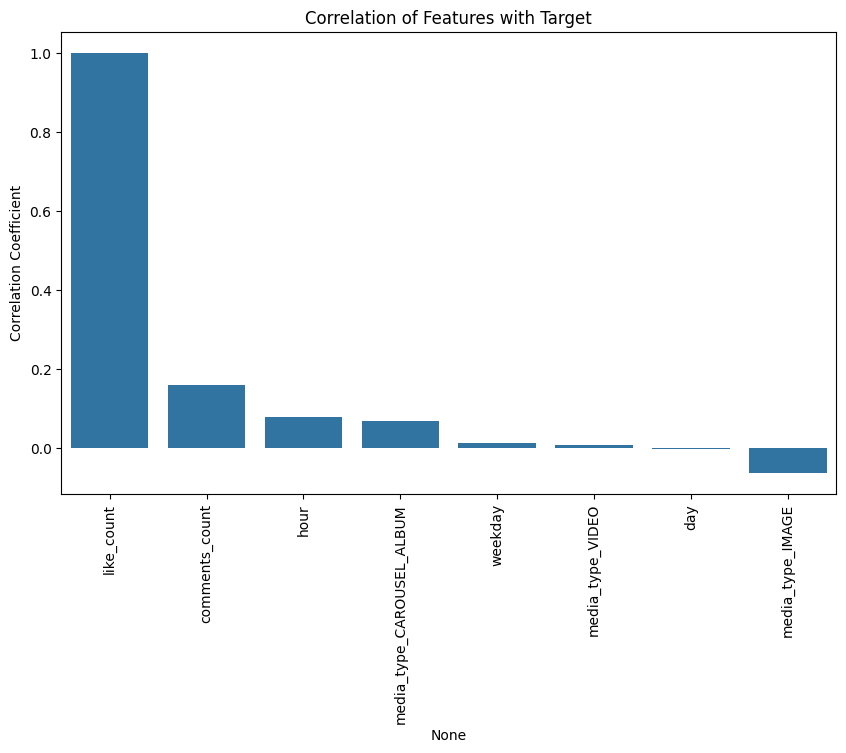

In [497]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine X and y into a single DataFrame for correlation analysis
X_with_y = X.copy()
X_with_y['like_count'] = y  # Add target variable (y) to the feature set

# Compute the correlation matrix
correlation_with_target = X_with_y.corr()['like_count'].sort_values(ascending=False)

# Display correlations with the target
print("Correlations of features with the target variable:")
print(correlation_with_target)

# Plot the correlations with the target variable
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.xticks(rotation=90)
plt.title("Correlation of Features with Target")
plt.ylabel("Correlation Coefficient")
plt.show()


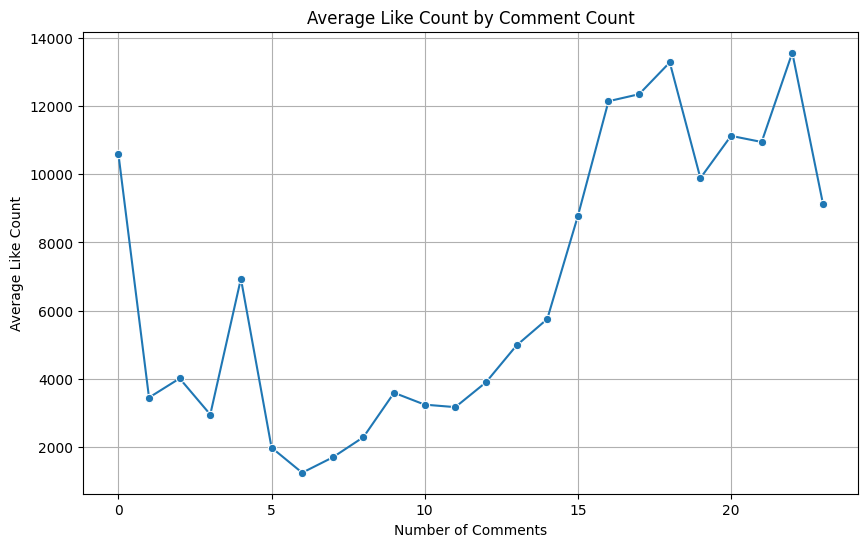

In [498]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Prepare feature matrix (X) and target (y)
X_relations = X_with_y.copy()
#X_relations['interaction_comments_follower'] = X_relations['log_comments_count'] * X_relations['follower_count']

# Aggregate average like_count by comments_count
comment_like_relation = X_relations.groupby('hour')['like_count'].mean()

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.lineplot(x=comment_like_relation.index, y=comment_like_relation.values, marker='o')
plt.title('Average Like Count by Comment Count')
plt.xlabel('Number of Comments')
plt.ylabel('Average Like Count')
plt.grid(True)
plt.show()


In [499]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize captions
caption_vectorizer = TfidfVectorizer(max_features=3000, stop_words='english', ngram_range=(1, 2))
caption_tfidf = caption_vectorizer.fit_transform(train_merged_df['caption'].fillna(""))


# Convert to DataFrames
caption_tfidf_df = pd.DataFrame(caption_tfidf.toarray(), columns=[f"caption_tfidf_{i}" for i in range(caption_tfidf.shape[1])])




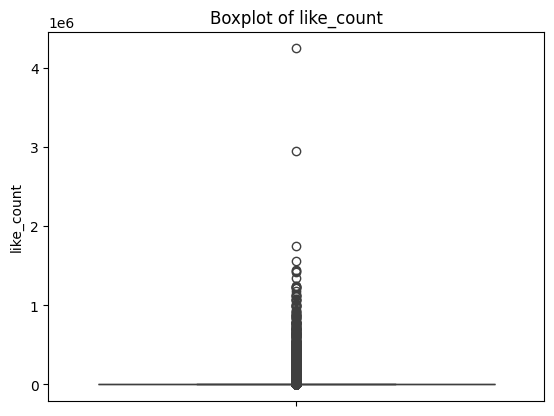

In [500]:
# Check for outliers using boxplot
sns.boxplot(X_with_y['like_count'])
plt.title('Boxplot of like_count')
plt.show()

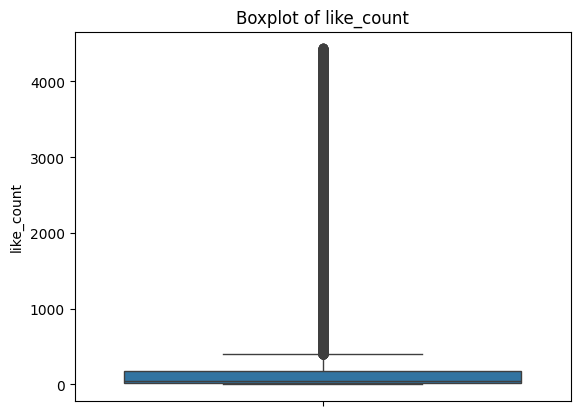

In [501]:
Q1 = train_posts_df_cleaned['like_count'].quantile(0.15)
Q3 = train_posts_df_cleaned['like_count'].quantile(0.85)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR
filtered_df = train_posts_df_cleaned[
    (train_posts_df_cleaned['like_count'] >= lower_bound) &
    (train_posts_df_cleaned['like_count'] <= upper_bound)
]

sns.boxplot(filtered_df['like_count'])
plt.title('Boxplot of like_count')
plt.show()


In [502]:
# FIND new relations with features

import numpy as np

# Make a copy of the original X to avoid modifying it directly
X_transformed = X_with_y.copy()

# Apply polynomial transformations
for col in X.columns:
    # Check if the column is numerical (dtype of individual column)

        X_transformed[f'{col}^2'] = X[col] ** 2
        X_transformed[f'{col}^3'] = X[col] ** 3

# Apply logarithmic transformations
for col in X.columns:
    # Check if the column is numerical (dtype of individual column)
    if X[col].dtype in ['int64', 'float64']:
        # Add log-transformed columns (handle zeros and negatives gracefully)
        X_transformed[f'log_{col}'] = np.log1p(X[col])  # log(x + 1) to avoid log(0)


X_transformed['log_like_count'] = np.log1p(X_transformed['like_count'])



X_transformed['scaled_like_count'] = filtered_df['like_count']
X_transformed['scaled_log_like_count'] = np.log1p(X_transformed['scaled_like_count'])

# Interaction between followers and comments
X_transformed['followers_comments_interaction'] = (
    train_merged_df['follower_count'] *
    train_merged_df['comments_count']
)



X_transformed['follower_count']=train_merged_df['follower_count']
X_transformed['following_count'] = train_merged_df['following_count']

#To not to have division by 0
train_merged_df['following_count'] = train_merged_df['following_count'].replace(0, 1e-6)

X_transformed['follower_following_ratio']=train_merged_df['follower_count'] /train_merged_df['following_count']
X_transformed['follower_following_ratio'] = X_transformed['follower_following_ratio'].replace([np.inf, -np.inf], np.nan)

# Optional: Fill NaN with a default value (e.g., 0)
X_transformed['follower_following_ratio'] = X_transformed['follower_following_ratio'].fillna(0)





<ipython-input-502-2b19d7f6fa2e>:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_merged_df['following_count'] = train_merged_df['following_count'].replace(0, 1e-6)
<ipython-input-502-2b19d7f6fa2e>:45: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_transformed['follower_following_ratio'] = X_transformed['follower_following_ratio'].replace([np.inf, -np.inf], np.nan)


Correlations of extended features with the target variable:
scaled_like_count                 1.000000
like_count                        1.000000
scaled_log_like_count             0.681933
log_comments_count                0.404123
log_like_count                    0.388734
comments_count                    0.161381
followers_comments_interaction    0.127402
follower_count                    0.084966
hour^2                            0.080553
hour                              0.078602
hour^3                            0.078518
log_media_type_CAROUSEL_ALBUM     0.068339
media_type_CAROUSEL_ALBUM^3       0.068339
media_type_CAROUSEL_ALBUM^2       0.068339
media_type_CAROUSEL_ALBUM         0.068339
follower_following_ratio          0.032951
following_count                   0.023914
weekday^3                         0.022440
comments_count^2                  0.020760
weekday^2                         0.019955
weekday                           0.015038
comments_count^3                  0.0

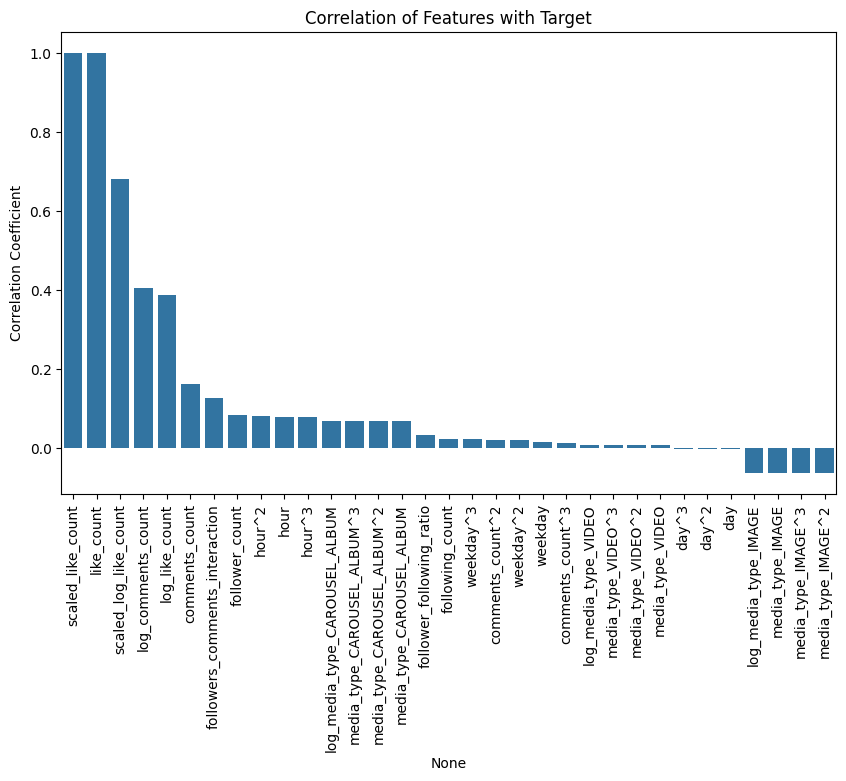

In [503]:
X_with_y = X_transformed.copy()
#X_with_y['target'] = y  # Add target variable (y) to the feature set

# Compute the correlation matrix
correlation_with_target = X_with_y.corr()['like_count'].sort_values(ascending=False)

# Display correlations with the target
print("Correlations of extended features with the target variable:")
print(correlation_with_target)

# Plot the correlations with the target variable
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.xticks(rotation=90)
plt.title("Correlation of Features with Target")
plt.ylabel("Correlation Coefficient")
plt.show()

<Axes: xlabel='log_comments_count', ylabel='log_like_count'>

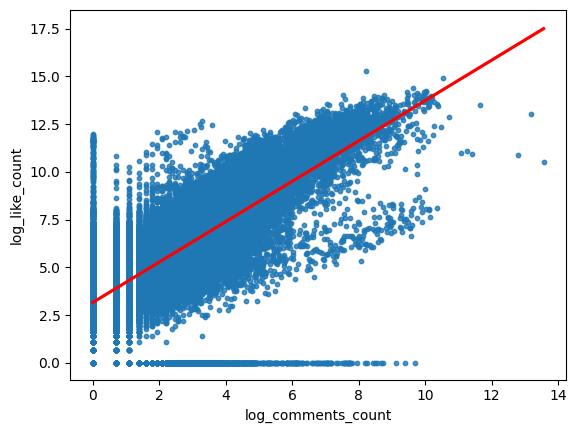

In [504]:
sns.regplot(x=X_transformed['log_comments_count'], y=X_transformed['log_like_count'], scatter_kws={'s': 10}, line_kws={'color': 'red'})


In [505]:
filtered_df.shape

(86424, 11)

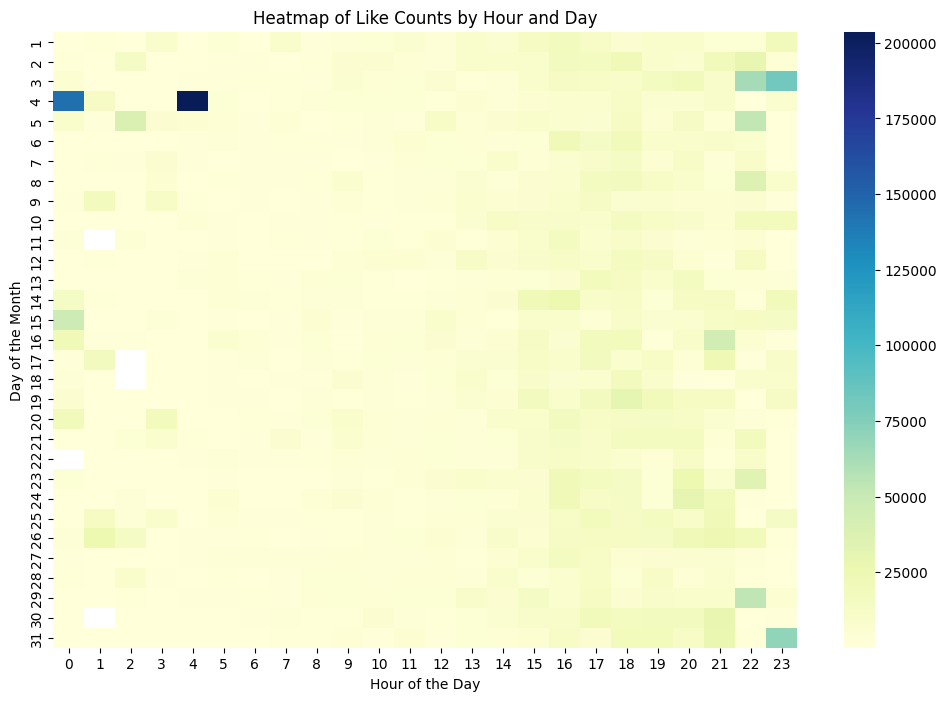

In [506]:
# Aggregate like counts by hour and day
heatmap_data = X_relations.pivot_table(
    values='like_count',
    index='day',
    columns='hour',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, cbar=True)
plt.title('Heatmap of Like Counts by Hour and Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Month')
plt.show()


#### Evaluation Metrics

In [507]:
def log_mse_like_counts(y_true, y_pred):
  """
  Calculate the Log Mean Squared Error (Log MSE) for like counts (log(like_count + 1)).

  Parameters:
  - y_true: array-like, actual like counts
  - y_pred: array-like, predicted like counts

  Returns:
  - log_mse: float, Log Mean Squared Error
  """
  # Ensure inputs are numpy arrays
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)

  # Log transformation: log(like_count + 1)
  log_y_true = np.log1p(y_true)
  log_y_pred = np.log1p(y_pred)

  # Compute squared errors
  squared_errors = (log_y_true - log_y_pred) ** 2

  # Return the mean of squared errors
  return np.mean(squared_errors)

In [508]:
import numpy as np

def calculate_r2(y_true, y_pred):
    """
    Calculate the R^2 (coefficient of determination) error.

    Parameters:
    y_true (array-like): True values.
    y_pred (array-like): Predicted values.

    Returns:
    float: R^2 score.
    """
    # Convert to numpy arrays for easy calculations
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate the mean of true values
    y_mean = np.mean(y_true)

    # Residual sum of squares
    ss_res = np.sum((y_true - y_pred) ** 2)

    # Total sum of squares
    ss_tot = np.sum((y_true - y_mean) ** 2)

    # R^2 calculation
    r2 = 1 - (ss_res / ss_tot)
    return r2


#### Prediction

In [509]:
def predict_like_count(username, current_post=None):
    def get_avg_metrics(posts):
        total_likes = 0
        total_comments = 0
        for post in posts:
            if current_post is not None and post.get("id") == current_post.get("id"):
                continue

            like_count = post.get("like_count", 0)
            comment_count = post.get("comments_count", 0)

            total_likes += like_count if like_count is not None else 0
            total_comments += comment_count if comment_count is not None else 0

        if not posts:
            return 0, 0

        return total_likes / len(posts), total_comments / len(posts)

    # Hourly coefficients
    hour_coefficients = {
        0: 1.1, 1: 0.3, 2: 0.35, 3: 0.3, 4: 0.7, 5: 0.2,
        6: 0.15, 7: 0.2, 8: 0.22, 9: 0.4, 10: 0.37, 11: 0.37,
        12: 0.4, 13: 0.5, 14: 0.6, 15: 0.85, 16: 1.3, 17: 1.4,
        18: 1.5, 19: 1.1, 20: 1.2, 21: 1.2, 22: 1.7, 23: 1.0
    }

    # Retrieve average metrics
    if username in username2posts_train:
        avg_like_count, avg_comment_count = get_avg_metrics(username2posts_train[username])
    elif username in username2posts_test:
        avg_like_count, avg_comment_count = get_avg_metrics(username2posts_test[username])
    else:
        print(f"No data available for {username}")
        return -1

    # Retrieve full post data if `current_post` is incomplete
    if current_post and "hour" not in current_post:
        post_id = current_post.get("id")
        matched_row = train_cleaned_profile_df.loc[train_profile_df_cleaned["id"] == post_id]
        if not matched_row.empty:
            current_post["hour"] = matched_row["hour"].values[0]
            current_post["comments_count"] = matched_row["comments_count"].values[0]

    # Calculate log_comments_count
    current_comments = current_post.get("comments_count", avg_comment_count) if current_post else avg_comment_count
    log_comments_count = np.log1p(current_comments)

    # Regression adjustment
    adjusted_like_count = avg_like_count - (0.1 * log_comments_count) +2

    # Hour adjustment
    post_hour = current_post.get("hour", -1) if current_post else -1
    if post_hour in hour_coefficients:
        hour_coefficients[post_hour] = hour_coefficients[post_hour]
        if hour_coefficients[post_hour] >= 1:
            adjusted_like_count +=  (adjusted_like_count * hour_coefficients[post_hour]) * 0.1
        else:
            adjusted_like_count -=  (adjusted_like_count * hour_coefficients[post_hour]) * 0.05


    # Penalize below-average comments
    if current_post and current_comments < avg_comment_count:
        penalty = avg_like_count * 0.5
        adjusted_like_count -= penalty

    return max(adjusted_like_count, 0)  # Ensure non-negative predictions


In [510]:
#@title Train Dataset evaluation

y_like_count_train_true = []
y_like_count_train_pred = []
for uname, posts in username2posts_train.items():
  for post in posts:
    pred_val = predict_like_count(uname, post)
    true_val = post.get("like_count", 0)
    if true_val is None:
      true_val = 0

    y_like_count_train_true.append(true_val)
    y_like_count_train_pred.append(pred_val)

print(f"Log MSE Train= {log_mse_like_counts(y_like_count_train_true, y_like_count_train_pred)}")

Log MSE Train= 1.0539985742775873


In [511]:
print(f"R^2 Train= {calculate_r2(y_like_count_train_true, y_like_count_train_pred)}")

R^2 Train= 0.5943863238618015


In [512]:
import json

# Step 1: Read the test usernames from the file
test_data_path = "/content/drive/MyDrive/CS412Data/test-classification-round3.dat"
test_unames = []
with open(test_data_path, "rt") as fh:
    for line in fh:
        test_unames.append(line.strip())

print(f"Loaded {len(test_unames)} test usernames.")

Loaded 1000 test usernames.


In [516]:
import json

# Step 1: Read the test usernames from the file
test_data_path = "/content/drive/MyDrive/CS412Data/test-classification-round3.dat"
test_unames = []
with open(test_data_path, "rt") as fh:
    for line in fh:
        test_unames.append(line.strip())

print(f"Loaded {len(test_unames)} test usernames.")

# Step 2: Filter the test dataset for these usernames
filtered_test_posts = test_posts_df_cleaned[test_posts_df_cleaned['username'].isin(test_unames)]

print(f"Filtered test posts for {filtered_test_posts.shape[0]} posts.")

# Step 3: Predict like counts for the filtered test posts
like_count_predictions = {}
for _, post in filtered_test_posts.iterrows():
    username = post['username']
    post_id = post['id']  # Use 'id' column as unique identifier

    # Construct the current post dictionary
    current_post = {
        "id": post_id,
        "hour": post['hour'],
        "comments_count": post['comments_count']
    }

    # Predict like count
    predicted_like_count = predict_like_count(username, current_post)
    like_count_predictions[post_id] = int(round(predicted_like_count))

# Step 4: Save predictions to a JSON file
output_file_path = "/content/drive/MyDrive/CS412Data/filtered_test_like_predictions.json"
with open(output_file_path, "w", encoding="utf-8") as outfile:
    json.dump(like_count_predictions, outfile, indent=4)

print(f"Predicted like counts for test usernames saved to: {output_file_path}")


Loaded 1000 test usernames.
Filtered test posts for 25470 posts.
Predicted like counts for test usernames saved to: /content/drive/MyDrive/CS412Data/filtered_test_like_predictions.json


In [522]:
#@title Test Dataset

path = "/content/drive/MyDrive/CS412Data/test-regression-round3.jsonl"
output_path = "/content/drive/MyDrive/CS412Data/filtered_test_like_predictions.json"

output_list = []

with open(path, "rt") as fh:
    for line in fh:
        sample = json.loads(line.strip())  # Parse each JSON line
        username = sample["username"]  # Extract username from the sample

        # Predict like count
        pred_val = predict_like_count(username)

        # Update sample with the predicted like count
        sample["like_count"] = int(pred_val)

        # Append the updated sample to the output list
        output_list.append({
            "id": sample["id"],  # Assuming "id" exists in the sample
            "like_count": sample["like_count"]
        })

# Write the predictions to the output JSON file
with open(output_path, "wt") as of:
    json.dump(output_list, of, indent=4)

print(f"Predictions saved to: {output_path}")

Predictions saved to: /content/drive/MyDrive/CS412Data/filtered_test_like_predictions.json
